# Lec 09. Neural Networks - MNIST

In [1]:
import torch
import torch.nn.init
import torch.nn as nn
import torch.optim as optim

from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## MNIST Data

In [3]:
mnist_train = datasets.MNIST(root='data/', 
                             train=True,
                             transform=transforms.ToTensor(),
                             download=True)

mnist_test = datasets.MNIST(root='data/',
                            train=False,
                            transform=transforms.ToTensor(),
                            download=True)

In [4]:
mnist_train.train_data.size(), mnist_test.test_data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

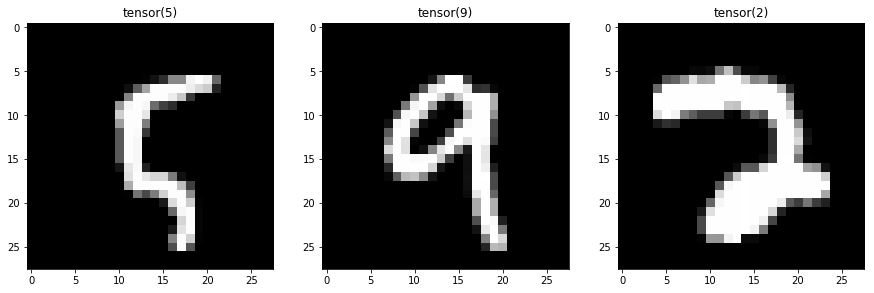

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(mnist_train.train_labels[100])
ax1.imshow(mnist_train.train_data[100,:,:].numpy(), cmap='gray')

ax2.set_title(mnist_train.train_labels[110])
ax2.imshow(mnist_train.train_data[110,:,:].numpy(), cmap='gray')

ax3.set_title(mnist_train.train_labels[120])
ax3.imshow(mnist_train.train_data[120,:,:].numpy(), cmap='gray')

## Batch Training - DataLoader

* dataset (Dataset) – dataset from which to load the data.
* batch_size (int, optional) – how many samples per batch to load (default: 1).
* shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
* num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [6]:
batch_size = 100

data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          num_workers = 0)

In [7]:
for i in range(1) :
    batch_images, batch_labels = next(iter(data_loader))
    print(batch_labels.numpy())
    print(len(batch_labels.numpy()))

[0 0 4 5 3 3 3 0 7 3 8 5 4 8 5 0 2 8 7 5 9 2 9 0 3 2 7 8 2 1 9 7 8 1 1 7 2
 3 5 0 1 4 1 0 3 7 2 1 3 6 9 2 6 1 3 2 0 2 2 7 2 2 5 0 2 0 6 4 5 4 7 9 0 6
 3 7 6 1 3 1 6 5 0 3 9 1 8 4 2 8 7 3 4 3 9 4 4 5 2 1]
100


## Define Model

In [8]:
linear1 = torch.nn.Linear(784, 512, bias = True)
relu1 = torch.nn.ReLU()

linear2 = torch.nn.Linear(512, 256, bias = True)
relu2 = torch.nn.ReLU()

out = torch.nn.Linear(256, 10, bias = True)

model = torch.nn.Sequential(linear1, relu1, linear2, relu2, out)

loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

* input: Variable :(N, C) where C = number of classes
* target: Variable :(N)
* weight (Tensor, optional): a manual rescaling weight given to each

In [9]:
len(mnist_train), batch_size

(60000, 100)

In [10]:
num_epochs = 10

for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size   # 60000 / 100 = 600
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        pred = model(X)
        cost = loss(pred, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % total_batch == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/10], lter [600/600] Loss: 2.2778
Epoch [2/10], lter [600/600] Loss: 2.2538
Epoch [3/10], lter [600/600] Loss: 2.2074
Epoch [4/10], lter [600/600] Loss: 2.1521
Epoch [5/10], lter [600/600] Loss: 2.0659
Epoch [6/10], lter [600/600] Loss: 1.9976
Epoch [7/10], lter [600/600] Loss: 1.8259
Epoch [8/10], lter [600/600] Loss: 1.6331
Epoch [9/10], lter [600/600] Loss: 1.4768
Epoch [10/10], lter [600/600] Loss: 1.3091
Learning Finished!


## Test Model

In [11]:
model.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)  # arg max
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * correct / total))

Accuracy of test images: 76.000000 %


Label      :  [1]
Prediction :  [1]


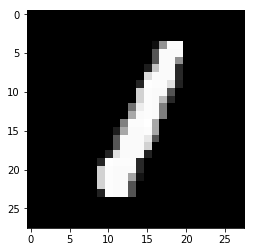

In [12]:
# random sampling
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label      : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## Black Box

Prediction :  [0]


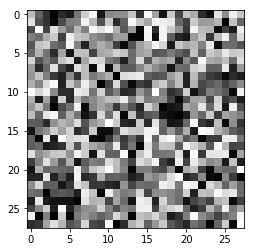

In [13]:
# 임의의 28*28 이미지 생성하여 테스트

blackbox = Variable(torch.rand(X_single_data.size()))
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())